<a href="https://colab.research.google.com/github/jennysands/Software-Engineering/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=59

--2022-10-12 12:59:07--  https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=59
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgpiosenka%2F100-bird-species%2Fversions%2F59%3Fresource%3Ddownload [following]
--2022-10-12 12:59:07--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgpiosenka%2F100-bird-species%2Fversions%2F59%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=59’

download?datasetVer     [ <=>                ]   6.48K  --.-KB/s    i

In [ ]:
!unzip "drive/MyDrive/Image classifier/Dataset.zip" -d "drive/MyDrive/Image classifier/test"

Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/091.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/092.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/093.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/094.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/095.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/096.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/097.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/098.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/099.jpg  
  inflating: drive/MyDrive/Image classifier/test/Dataset/train/WATTLED CURASSOW/100.jpg  
  inflating: drive/MyDrive/Image classifier/te

In [72]:
from tables import path
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/train/ABBOTTS BABBLER/001.jpg')
# imgplot = plt.imshow(img)
# plt.show()


dataframe = {"Bird name": [], "Path": []}
dataframe = pd.DataFrame(dataframe)

p = 0
df = pd.read_csv (r'drive/MyDrive/Image classifier/test/Dataset/birds.csv')
for i in df["filepaths"]:
  if i.startswith("tr"):
    # print(i)
    # print(df["scientific label"].loc[[p]])

    labels = (df["labels"].loc[[p]])
    labels = labels.to_string(index=False, header=False)
    new_row = {"Bird name":labels , "Path":i}
    dataframe = dataframe.append(new_row, ignore_index=True)
    
    # img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/'+i)
    # imgplot = plt.imshow(img)
    # plt.show()
    p+=1
    continue
  else:
    break

print(dataframe)
dataframe.to_csv("trainfiles.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7eff70871710> (for post_execute):


KeyboardInterrupt: ignored

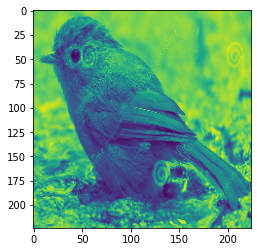

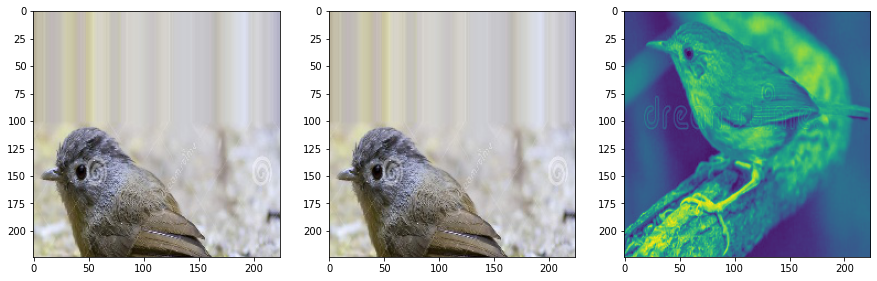

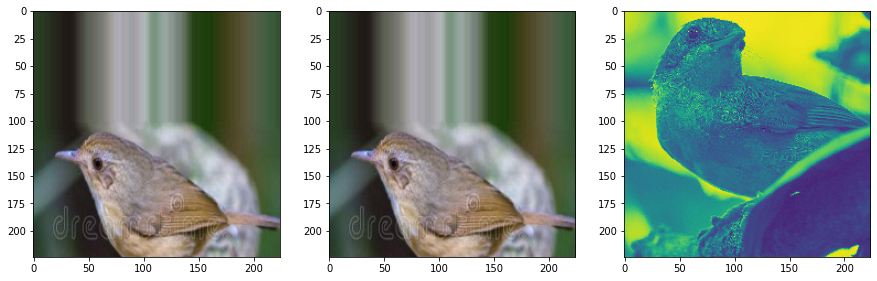

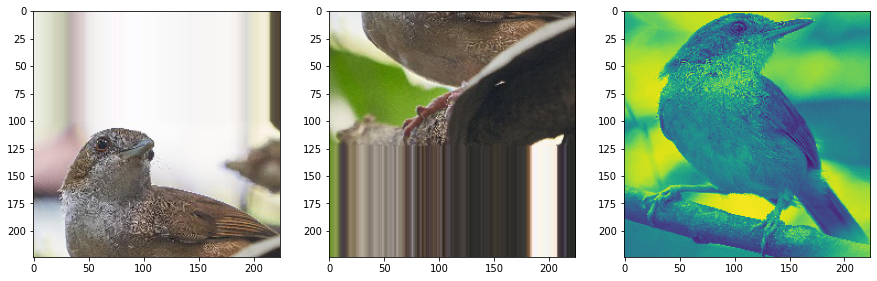

Error in callback <function flush_figures at 0x7eff70878200> (for post_execute):


KeyboardInterrupt: ignored

In [8]:
import pandas as pd
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator


df = pd.read_csv (r'/content/trainfiles.csv')
p=0
for path in df["Path"]:
  img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/'+path)
  imgplot = plt.imshow(img)

  '''Make the image gray, to reduce computation complexity'''
  gray_image = skimage.color.rgb2gray(img)
  plt.imshow(gray_image, cmap = 'gray')
  '''Normalize the image'''
  norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
  plt.imshow(norm_image)



  '''Data augmentation. Changing the images to increase diversity without collecting new data.'''
  data = img_to_array(img)

  # expand dimension to one sample
  samples = expand_dims(img, 0)

  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-100,100])

  # create an iterator
  it = datagen.flow(samples, batch_size=1)
  fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

  # generate batch of images
  for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 



  '''Get the different colors'''
  # i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  # i.set_figwidth(20) 

  # im1.imshow(img)  #Original image
  # im2.imshow(img[:, : , 0]) #Red
  # im3.imshow(img[:, : , 1]) #Green
  # im4.imshow(img[:, : , 2]) #Blue
  # #plt.show()
  # i.suptitle('Original & RGB image channels')


  # labels = (df["Bird name"].loc[[p]])
  # labels = labels.to_string(index=False, header=False)
  # print(path, labels)
  p += 1


In [ ]:
  #Code for images
  img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/'+path)
  imgplot = plt.imshow(img)


  i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  i.set_figwidth(20) 

  im1.imshow(img)  #Original image
  im2.imshow(img[:, : , 0]) #Red
  im3.imshow(img[:, : , 1]) #Green
  im4.imshow(img[:, : , 2]) #Blue
  plt.show()